## Exploratory Data Analysis

#### Initial exam of the quality of the data.

In [3]:
import pandas as pd
from matplotlib.pyplot import show
import seaborn as sns
sns.set_style("white", {'font.family':'serif', 'font.serif':'Times New Roman'})

In [4]:
patients = pd.read_csv('patients.csv')

In [5]:
patients.head(10)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
5,239,255,M,2109-08-05 00:00:00,NaN,NaN,NaN,0
6,240,256,M,2086-07-31 00:00:00,NaN,NaN,NaN,0
7,241,257,F,2031-04-03 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,1
8,242,258,F,2124-09-19 00:00:00,NaN,NaN,NaN,0
9,243,260,F,2105-03-23 00:00:00,NaN,NaN,NaN,0


#### Convert the expire flag from string to ground truth label

In [6]:
patients.loc[patients['EXPIRE_FLAG'] == 1, 'status'] = "Deceased"

In [7]:
patients.loc[patients['EXPIRE_FLAG'] == 0, 'status'] = "Alive"

In [8]:
patients.head(10)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,status
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,Alive
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1,Deceased
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0,Alive
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0,Alive
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0,Alive
5,239,255,M,2109-08-05 00:00:00,NaN,NaN,NaN,0,Alive
6,240,256,M,2086-07-31 00:00:00,NaN,NaN,NaN,0,Alive
7,241,257,F,2031-04-03 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,1,Deceased
8,242,258,F,2124-09-19 00:00:00,NaN,NaN,NaN,0,Alive
9,243,260,F,2105-03-23 00:00:00,NaN,NaN,NaN,0,Alive


#### Convert gender to "female" and "male"

In [9]:
patients.loc[patients['GENDER'] == "F", 'Sex'] = "Female"

In [10]:
patients.loc[patients['GENDER'] == "M", 'Sex'] = "Male"

### Mortality rate by gender

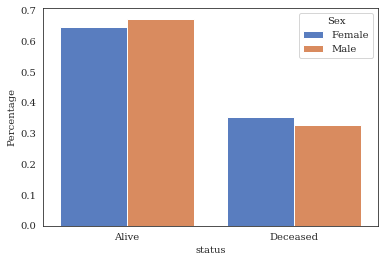

In [11]:
x, y, hue = "status", "Percentage", "Sex"
hue_order = ["Male", "Female"]
sns.set_palette("muted")
(patients[x]
 .groupby(patients['Sex'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

#### We can see that the gender is balanced for both alive and deceased patients.

### Exam the ICU stay records

In [12]:
stays = pd.read_csv('icustays.csv')
stays.dropna(inplace = True)

In [13]:
stays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [106]:
import math
# calculate the length of stay in days for each icu stay
stays['last'] = stays['LOS'].round()

In [107]:
stays = stays.astype({'last': 'int32'})

In [108]:
stays['Days'] = stays['last'].copy()

#### Convert the days to labels

In [109]:
stays.loc[(stays['last'] <14) & (stays['last'] >8), 'Days'] = "8-14"

In [110]:
stays.loc[stays['last'] >= 14, 'Days'] = ">14"

In [111]:
stays = stays.astype({'Days': 'str'})

### Histogram of the length of stays in ICU

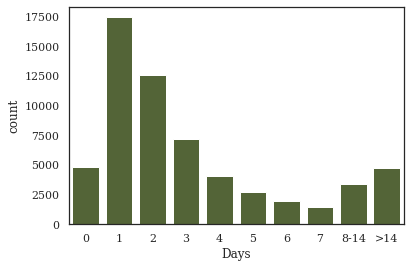

In [112]:
ax = sns.countplot(x="Days", data=stays,order=['0', '1', '2', '3', '4', '5', '6', '7', '8-14', '>14'],
                  color = 'darkolivegreen')

#### We observe that the most frequent stay for a patient in ICU is 1 to 2 days, therefore we set our observation window to be no more than 48 hours.

### Exam the unique patients having prescriptions, diagnoses and lab results.

In [116]:
patients.groupby('SUBJECT_ID')['SUBJECT_ID'].nunique()

SUBJECT_ID
2        1
3        1
4        1
5        1
6        1
        ..
99985    1
99991    1
99992    1
99995    1
99999    1
Name: SUBJECT_ID, Length: 46520, dtype: int64

In [117]:
prescriptions = pd.read_csv("PRESCRIPTIONS.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [118]:
prescriptions.groupby('SUBJECT_ID')['SUBJECT_ID'].nunique()

SUBJECT_ID
2        1
4        1
6        1
8        1
9        1
        ..
99985    1
99991    1
99992    1
99995    1
99999    1
Name: SUBJECT_ID, Length: 39363, dtype: int64

In [119]:
diag = pd.read_csv("DIAGNOSES_ICD.csv")

In [120]:
diag.groupby('SUBJECT_ID')['SUBJECT_ID'].nunique()

SUBJECT_ID
2        1
3        1
4        1
5        1
6        1
        ..
99985    1
99991    1
99992    1
99995    1
99999    1
Name: SUBJECT_ID, Length: 46520, dtype: int64